In [9]:
#Superdense Coding
#This notebook demonstrates Superdense Coding (SDC) in quantum computing
#We first use Qiskit's simulator to test our quantum circuit, 
#and then try it out on a real quantum computer.

#The Difference between Superdense Coding and Quantum Teleportation
#Quantum teleportation and superdense coding are closely related
#Hence they cause confusion
#Quantum teleportation is a process by which 
#the state of qubit (|ψ⟩) can be transmitted from one location to another, 
#with the help of classical communication and a Bell pair. 
#So we may say it is a protocol that destroys the quantum state of a qubit in one location 
#and recreates it on a qubit at a distant location, with the help of shared entanglement. 

#Superdense coding is a procedure that allows someone 
#to send two classical bits to another party using just a single qubit of communication.

#The teleportation protocol is actually a flipped version of the superdense coding protocol, 
#in the sense that Alice and Bob merely “swap their equipment.”


#Simulating the Superdense Coding Protocol
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [10]:
#The Process
#Step 1
#The process starts with a third party, Eve 
#Two qubits are prepared by Eve in an entangled state 
#She initially starts the 2 qubits in the basis state |0⟩
  #Create the quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.barrier()

In [11]:
#She applies Hadamard gate (H) to the first qubit to create superposition
#She then applies CNOT gate (CX) using the first qubit as a control and the second as the target
#This is the entangled state (Bell pair) we mention earlier.
  #First generate the entangled pair between Alice and Bob 
  #(Remember: Hadamard followed by CX generates a Bell pair)
  #At this point, qubit 1 goes to Bob and qubit 2 goes to Alice
qc.h(0)
qc.cx(0, 1)
qc.barrier()

#Step 2
#Eve sent the first qubit to Alice and second qubit to Bob

In [12]:
#The goal of the protocol is for Alice to send 2 classical bits of information to Bob using her qubit
#But before she does, she needs to apply a set of quantum gates to her qubit 
#depending on the 2 bits of information she wants to send 
#Alice follows Encoding Rules for Superdense Coding (Alice protocol)
#e.g., if she wants to send a 00, she does nothing to her qubit (apply the identity (I) gate). 
#If she sends a 01, then she applies the X gate
#Depending on what she wants to send, she applies the appropriate gate
  #Next, Alice encodes her message. First, we need to prepare the state Alice will like to send,
  #In this tutorial, Alice is sending 11:
qc.z(0)
qc.x(0)
qc.barrier()

#Alice then sends her qubit to Bob for the final step in the process

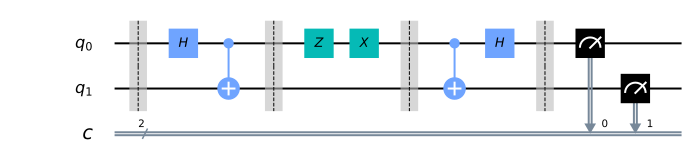

In [13]:
#Step 3
#Bob receives Alice's qubit (first qubit) and uses his qubit to decode Eve's message
#Notice that he does not need to have knowledge of the state in order to decode it — 
#he only needs knowledge of the restoration operation.

#Bob applies a CNOT gate using the first qubit as control and the second as target
#Then he applies a Hadamard gate and 
  # After recieving qubit 0, Bob applies the recovery protocol:
qc.cx(0, 1)
qc.h(0)
#finally performs a measurement in both qubits to extract the classical bits encoded in Alice's qubit.
  # Let's take a measurement to see which classical bit of information Bob receives:
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)

# Draw our output
qc.draw(output = "mpl")

{'11': 1024}


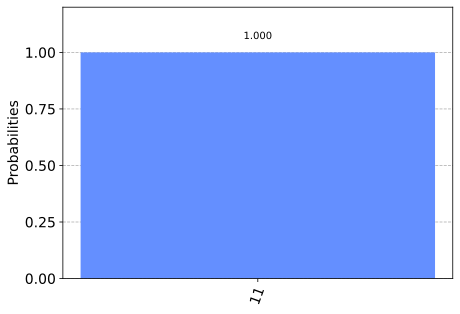

In [14]:
#When Bob performs the measurements, 
#he ends up with four possible outcomes with probability of 1 each
#Note that the last outcome has a negative sign −|11⟩
#writing it as |11⟩ is also correct because the probability is calculated as the amplitude of squared.

#Visualizing Our Measurements
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [15]:
#Superdense Coding on a Real Quantum Computer
#Let's see how superdense coding works on real quantum computer.
#First, we want to load our account to get the least busy quantum system
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
job = execute(qc, backend=backend, shots=shots)

Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_london


In [16]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


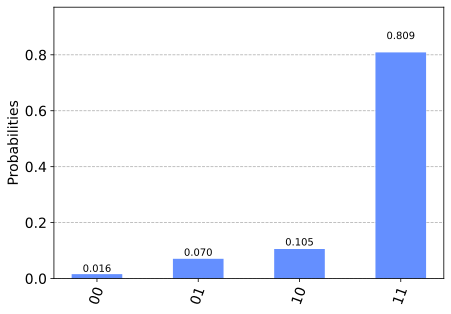

In [17]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [18]:
#As we see that there are a few results from the other three states when run in a real quantum computer. These are due to errors in the gates that were applied and qubit decoherence.
correct_results = result.get_counts(qc)['11']
accuracy = (correct_results/float(shots))*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 80.86%


# Another Example

In [1]:
'''
    Superdense Coding

    Task. Transmit two bits of classical information between 
    Alice and Bob using only one qubit.

'''
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

qr = QuantumRegister(2)  # Initialize qubits
cr = ClassicalRegister(2)  # Initialize bits for record measurements
circuit = QuantumCircuit(qr, cr)

# Create Bell state - Alice and Bob share an entagle qubit pair
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])

circuit.barrier()

# Apply Quantum operations
# I x I -> Alice will get 00
# X x I -> Alice will get 01
# Z x I -> Alice will get 10
# (XZ) x I -> Alice will get 11
circuit.x(qr[0])
circuit.z(qr[0])

circuit.barrier()

# Apply Hadamard to qubit 0 - Take qubit 0 out of superposition
circuit.cx(qr[0], qr[1])
circuit.h(qr[0])

circuit.barrier()

# Measurement
circuit.measure(qr, cr)

# Run our circuit with local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)
# Measurement is 11


{'11': 1024}
